In [4]:
import csv
quadro1=[]
quadro2=[]
quadro3=[]
quadro5=[]

with open ("Quadro1.csv") as file:     ############## da completare
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        quadro1.append(line)
with open ("Quadro2.csv") as file:
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        quadro2.append(line)
with open ("Quadro3.csv") as file:
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        quadro3.append(line)
with open ("Quadro5.csv") as file:
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        quadro5.append(line)

### dataset comuni

In [5]:
comuni = []
# 0 id_istat
# 1 nome comune
# 2 long
# 3 lat
# 4 regione
with open ("GeolocComuni.csv") as file:     ############## da completare
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        comuni.append(line)

### converto i numeri nei quadri in interi e sostituisco eventuali spazi vuoti con zeri

In [6]:
for quadro in [quadro1,quadro2,quadro3,quadro5]:
    for riga in quadro:
        if riga[2]=='' or riga[2]==' ':
            riga[2] = int(0)  ## converte i vuoti in zeri
        else:
            riga[2] = int(riga[2])
        if riga[1][0] == ' ': ## toglie gli spazi prima del nome delle città
            riga[1] = riga[1][1:]
        if riga[1] == 'Reggio Emilia': ## cambio nome reggio emilia per compatibilitá
            riga[1] = "Reggio nell'Emilia"
        if riga[0] == 'Reggio Emilia':
            riga[0] = "Reggio nell'Emilia"
            
### Check
for quadro in [quadro1,quadro2,quadro3,quadro5]:
    for riga in quadro:
        if type(riga[0]) != type(''): # controlla se al posto 0 di ogni riga c'è una stringa
            print('Problema: ', riga)
        elif type(riga[1]) != type(''): # controlla se al posto 1 di ogni riga c'è una stringa
            print('Problema: ', riga)
        elif type(riga[2]) != type(int(0)): # controlla se al posto 2 di ogni riga c'è un intero
            print('Problema: ', riga)
        elif riga[1][0] == ' ': # controlla se al posto 1 di ogni riga, la stringa non inizia con uno spazio
            print('Problema spazio', riga)
        elif len(riga) != 3: # controlla che la lunghezza di ogni riga sia 3
            print('Problema Lunghezza : ', riga)
        elif riga[0][0] == ' ': # controlla se al posto 0 di ogni riga, la stringa non inizia con uno spazio
            print('Problema spazio : ', riga)

## Unisco prima tutti i quadri e poi cerco i "doppioni" e li sommo. Inoltre rimuove le righe con zero collegamenti

In [7]:
def somma_su_doppioni(quadri):
    quadri_new = []
    lista_tratte = []
    for riga in quadri:
        if (riga[0]+riga[1] in lista_tratte) or (riga[1]+riga[0] in lista_tratte):
            try: index = lista_tratte.index(riga[0]+riga[1])
            except: index = lista_tratte.index(riga[1]+riga[0])
            quadri_new[index][2] += riga[2]
        else:
            quadri_new.append(riga)
            lista_tratte = [rigaa[0]+rigaa[1] for rigaa in quadri_new]
    
    return quadri_new
quadri = quadro1+quadro2+quadro3+quadro5

# elimino righe con zero collegamenti
indici_da_eliminare = []
for ii, riga in enumerate(quadri):
    if riga[2]==0:
        indici_da_eliminare.append(ii)

for indice in indici_da_eliminare[::-1]: # vado all'indietro altrimenti gli indici si modificano
    quadri.pop(indice)

# sommo sui doppioni
quadri_new = somma_su_doppioni(quadri)

### innanzitutto controllo che non ci siano solo "andate". Poi creo i ritorni e divido tutti i numeri di treni per due, approssimando per difetto quando serve.

In [8]:
## controllo che ogni tratta compaia solo in una direzione, e non anche inversa.
lista_tratte = lista_tratte = [rigaa[0]+rigaa[1] for rigaa in quadri_new]
for riga in quadri_new:
    if riga[0]+riga[1] in lista_tratte:
        if riga[1]+riga[0] in lista_tratte:
            print('problema')
    elif riga[1]+riga[0] in lista_tratte:
        if riga[0]+riga[1] in lista_tratte:
            print('problema')
    else:
        print('problema !')

## aggiungo anche le tratte inverse
quadri_temp = []
for riga in quadri_new:
    quadri_temp.append([riga[1],riga[0],riga[2]])
quadri_new += quadri_temp

for riga in quadri_new:
    riga[2] = riga[2]//2
    
quadri_new = sorted(sorted(quadri_new,key=lambda x: x[1]), key=lambda x: x[0])
quadri_new

[['Ancona', 'Bari', 4],
 ['Ancona', 'Barletta', 3],
 ['Ancona', 'Bologna', 5],
 ['Ancona', 'Brindisi', 2],
 ['Ancona', 'Foggia', 4],
 ['Ancona', 'Forlì', 1],
 ['Ancona', 'Lecce', 2],
 ['Ancona', 'Milano', 5],
 ['Ancona', 'Pesaro', 3],
 ['Ancona', 'Pescara', 5],
 ['Ancona', "Reggio nell'Emilia", 5],
 ['Ancona', 'Riccione', 2],
 ['Ancona', 'Rimini', 5],
 ['Ancona', 'Termoli', 4],
 ['Ancona', 'Torino', 3],
 ['Bari', 'Ancona', 4],
 ['Bari', 'Barletta', 3],
 ['Bari', 'Bologna', 4],
 ['Bari', 'Brindisi', 2],
 ['Bari', 'Foggia', 4],
 ['Bari', 'Lecce', 2],
 ['Bari', 'Milano', 4],
 ['Bari', 'Pesaro', 3],
 ['Bari', 'Pescara', 4],
 ['Bari', "Reggio nell'Emilia", 4],
 ['Bari', 'Riccione', 2],
 ['Bari', 'Rimini', 4],
 ['Bari', 'Termoli', 4],
 ['Bari', 'Torino', 3],
 ['Barletta', 'Ancona', 3],
 ['Barletta', 'Bari', 3],
 ['Barletta', 'Bologna', 3],
 ['Barletta', 'Brindisi', 2],
 ['Barletta', 'Foggia', 3],
 ['Barletta', 'Lecce', 2],
 ['Barletta', 'Milano', 3],
 ['Barletta', 'Pesaro', 3],
 ['Barletta',

### Controllo che tutte le cittá che abbiamo siano riconosciute nel dataset dei comuni con i codici istat

In [9]:
# 0 id_istat
# 1 nome comune
# 2 long
# 3 lat
# 4 regione
for riga in quadri_new:
    if not riga[0] in [comune[1] for comune in comuni]:
        print("problema: cittá source non trovata", riga[0])
    if not riga[1] in [comune[1] for comune in comuni]:
        print("problema: cittá dest non trovata", riga[1])

### converto nomi città in codici istat

In [10]:
def converti_in_codici(quadro, comuni):
    quadro_conv = []
    nomi_comuni = [comune[1] for comune in comuni]
    for riga in quadro:
        index_source = nomi_comuni.index(riga[0])
        index_dest = nomi_comuni.index(riga[1])
        quadro_conv.append([comuni[index_source][0],comuni[index_dest][0],riga[2]])
    return quadro_conv

quadro_prov_codici = converti_in_codici(quadri_new, comuni)
quadro_prov_codici

[['42002', '72006', 4],
 ['42002', '110002', 3],
 ['42002', '37006', 5],
 ['42002', '74001', 2],
 ['42002', '71024', 4],
 ['42002', '40012', 1],
 ['42002', '75035', 2],
 ['42002', '15146', 5],
 ['42002', '41044', 3],
 ['42002', '68028', 5],
 ['42002', '35033', 5],
 ['42002', '99013', 2],
 ['42002', '99014', 5],
 ['42002', '70078', 4],
 ['42002', '1272', 3],
 ['72006', '42002', 4],
 ['72006', '110002', 3],
 ['72006', '37006', 4],
 ['72006', '74001', 2],
 ['72006', '71024', 4],
 ['72006', '75035', 2],
 ['72006', '15146', 4],
 ['72006', '41044', 3],
 ['72006', '68028', 4],
 ['72006', '35033', 4],
 ['72006', '99013', 2],
 ['72006', '99014', 4],
 ['72006', '70078', 4],
 ['72006', '1272', 3],
 ['110002', '42002', 3],
 ['110002', '72006', 3],
 ['110002', '37006', 3],
 ['110002', '74001', 2],
 ['110002', '71024', 3],
 ['110002', '75035', 2],
 ['110002', '15146', 3],
 ['110002', '41044', 3],
 ['110002', '68028', 3],
 ['110002', '35033', 3],
 ['110002', '99013', 2],
 ['110002', '99014', 3],
 ['1

## Sommo sulle regioni prima convertendo i label in regioni, e poi sommando sui doppioni

In [11]:
def somma_su_doppioni_direzionata(quadri):
    quadri_new = []
    lista_tratte = []
    for riga in quadri:
        if (riga[0]+riga[1] in lista_tratte):
            index = lista_tratte.index(riga[0]+riga[1])
            quadri_new[index][2] += riga[2]
        else:
            quadri_new.append(riga)
            lista_tratte = [rigaa[0]+rigaa[1] for rigaa in quadri_new]
    
    return quadri_new


quadri_regioni = []
lista_comuni = [comune[1] for comune in comuni]
for riga in quadri_new:
    index_source = lista_comuni.index(riga[0])
    index_dest = lista_comuni.index(riga[1])
    quadri_regioni.append([comuni[index_source][4],comuni[index_dest][4],riga[2]])

# cerco treni che viaggiano all'interno della stessa regione
indici_da_eliminare = []
for ii, riga in enumerate(quadri_regioni):
    if riga[0]==riga[1]:
        indici_da_eliminare.append(ii)

for indice in indici_da_eliminare[::-1]: # vado all'indietro altrimenti gli indici si modificano
    quadri_regioni.pop(indice)
quadri_regioni = somma_su_doppioni_direzionata(quadri_regioni)

quadri_regioni = sorted(sorted(quadri_regioni,key=lambda x: x[1]), key=lambda x: x[0])

In [12]:
quadri_regioni

[['Abruzzo', 'Emilia-Romagna', 18],
 ['Abruzzo', 'Lombardia', 5],
 ['Abruzzo', 'Marche', 8],
 ['Abruzzo', 'Molise', 4],
 ['Abruzzo', 'Piemonte', 3],
 ['Abruzzo', 'Puglia', 15],
 ['Campania', 'Emilia-Romagna', 95],
 ['Campania', 'Friuli-Venezia Giulia', 2],
 ['Campania', 'Lazio', 69],
 ['Campania', 'Lombardia', 58],
 ['Campania', 'Piemonte', 23],
 ['Campania', 'Toscana', 51],
 ['Campania', 'Veneto', 28],
 ['Emilia-Romagna', 'Abruzzo', 18],
 ['Emilia-Romagna', 'Campania', 95],
 ['Emilia-Romagna', 'Friuli-Venezia Giulia', 4],
 ['Emilia-Romagna', 'Lazio', 113],
 ['Emilia-Romagna', 'Lombardia', 118],
 ['Emilia-Romagna', 'Marche', 33],
 ['Emilia-Romagna', 'Molise', 14],
 ['Emilia-Romagna', 'Piemonte', 27],
 ['Emilia-Romagna', 'Puglia', 57],
 ['Emilia-Romagna', 'Toscana', 100],
 ['Emilia-Romagna', 'Trentino-Alto Adige', 2],
 ['Emilia-Romagna', 'Umbria', 2],
 ['Emilia-Romagna', 'Veneto', 72],
 ['Friuli-Venezia Giulia', 'Campania', 2],
 ['Friuli-Venezia Giulia', 'Emilia-Romagna', 4],
 ['Friuli-

# lombardia veneto 226 treni: molti di più delle altre regioni. Strano ?

# Ora bisogna associare ad ogni regione il suo capoluogo

In [15]:
import csv
caps = []
with open ("capoluoghi.csv") as file:     ############## da completare
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        caps.append(line)

In [16]:
caps

[['Abruzzo', "L'Aquila"],
 ['Basilicata', 'Potenza'],
 ['Calabria', 'Catanzaro'],
 ['Emilia-Romagna', 'Bologna'],
 ['Friuli-Venezia Giulia', 'Trieste'],
 ['Lazio', 'Roma'],
 ['Liguria', 'Genova'],
 ['Lombardia', 'Milano'],
 ['Marche', 'Ancona'],
 ['Molise', 'Campobasso'],
 ['Piemonte', 'Torino'],
 ['Puglia', 'Bari'],
 ['Sardegna', 'Cagliari'],
 ['Sicilia', 'Palermo'],
 ['Toscana', 'Firenze'],
 ['Trentino-Alto Adige', 'Trento'],
 ['Umbria', 'Perugia'],
 ["Valle d'Aosta", 'Aosta'],
 ['Veneto', 'Venezia'],
 ['Campania', 'Napoli']]

In [27]:
#converto in capoluoghi
lista_regioni = [cap[0] for cap in caps]
quadri_capoluoghi = []
for riga in quadri_regioni:
    index1 = lista_regioni.index(riga[0])
    index2 = lista_regioni.index(riga[1])
    quadri_capoluoghi.append([caps[index1][1],caps[index2][1],riga[2]])
# converto in codici istat dei capoluoghi
quadri_capoluoghi = converti_in_codici(quadri_capoluoghi,comuni)
quadri_capoluoghi

[['66049', '37006', 18],
 ['66049', '15146', 5],
 ['66049', '42002', 8],
 ['66049', '70006', 4],
 ['66049', '1272', 3],
 ['66049', '72006', 15],
 ['63049', '37006', 95],
 ['63049', '32006', 2],
 ['63049', '58091', 69],
 ['63049', '15146', 58],
 ['63049', '1272', 23],
 ['63049', '48017', 51],
 ['63049', '27042', 28],
 ['37006', '66049', 18],
 ['37006', '63049', 95],
 ['37006', '32006', 4],
 ['37006', '58091', 113],
 ['37006', '15146', 118],
 ['37006', '42002', 33],
 ['37006', '70006', 14],
 ['37006', '1272', 27],
 ['37006', '72006', 57],
 ['37006', '48017', 100],
 ['37006', '22205', 2],
 ['37006', '54039', 2],
 ['37006', '27042', 72],
 ['32006', '63049', 2],
 ['32006', '37006', 4],
 ['32006', '58091', 2],
 ['32006', '15146', 10],
 ['32006', '1272', 1],
 ['32006', '48017', 2],
 ['32006', '27042', 24],
 ['58091', '63049', 69],
 ['58091', '37006', 113],
 ['58091', '32006', 2],
 ['58091', '15146', 68],
 ['58091', '1272', 26],
 ['58091', '48017', 51],
 ['58091', '22205', 2],
 ['58091', '2704

# normalizzo (codice chiara)

In [35]:
#cerco come prima cosa il fattore di normalizzazione dei treni per singola privincia
sing_norm=[]
treni=0
c=0
for ii,riga in enumerate(quadri_capoluoghi):
    treni+=float(riga[2]) # all'inizio sto sull'ii di riferimento
    c+=1
    if riga[0] != quadri_capoluoghi[ii-1][0]:
        if ii !=0:
            treni -= float(riga[2])
            #print(ii)
            for i in range(1,c):
                sing_norm.append(treni)
            c=1
            treni=float(riga[2])
    if ii==113:
        for i in range(0,c):
            sing_norm.append(treni)    

quadri_capoluoghi_norm=[] #contiene le tratte normalizzate in base al numero di treni della singola provincia
for jj,value in enumerate(quadri_capoluoghi):
    quadri_capoluoghi_norm.append([value[0],value[1],value[2]/sing_norm[jj]])
quadri_capoluoghi_norm

[['66049', '37006', 0.33962264150943394],
 ['66049', '15146', 0.09433962264150944],
 ['66049', '42002', 0.1509433962264151],
 ['66049', '70006', 0.07547169811320754],
 ['66049', '1272', 0.05660377358490566],
 ['66049', '72006', 0.2830188679245283],
 ['63049', '37006', 0.29141104294478526],
 ['63049', '32006', 0.006134969325153374],
 ['63049', '58091', 0.2116564417177914],
 ['63049', '15146', 0.17791411042944785],
 ['63049', '1272', 0.0705521472392638],
 ['63049', '48017', 0.15644171779141106],
 ['63049', '27042', 0.08588957055214724],
 ['37006', '66049', 0.02748091603053435],
 ['37006', '63049', 0.1450381679389313],
 ['37006', '32006', 0.0061068702290076335],
 ['37006', '58091', 0.17251908396946564],
 ['37006', '15146', 0.1801526717557252],
 ['37006', '42002', 0.050381679389312976],
 ['37006', '70006', 0.021374045801526718],
 ['37006', '1272', 0.04122137404580153],
 ['37006', '72006', 0.08702290076335878],
 ['37006', '48017', 0.15267175572519084],
 ['37006', '22205', 0.0030534351145038

In [42]:
#with open('capoluoghi_norm.csv','w') as f:
#    for a in quadri_capoluoghi_norm:
#        f.write(f'{a[0]},{a[1]},{a[2]}\n')

In [45]:
# import folium
# 
# def create_map(center=[42,13]):
#     return folium.Map(location=center, zoom_start=5)
# 
# def add_prov(mappa, prov):
#     a = folium.Circle(radius=5e3, location=[float(prov[2]), float(prov[1])],
#                          ).add_to(mappa)
#     return a
# 
# def add_link(mappa, prov):
#     b = folium.PolyLine(locations=[[float(prov[2]), float(prov[1])],[float(prov[5]), float(prov[4])]],
#                         weight=prov[6]*10**2, color='black').add_to(mappa)
#     
#     
# m = create_map()
# for prov in quadri_capoluoghi:
#     add_prov(m, prov)
#     add_link(m, prov)
# m.save('mappa_italia_treni.html')
# m

IndexError: list index out of range

In [1]:
import pandas as pd

In [11]:
treni_norm_out = pd.read_csv('../csv_finali/capoluoghi_norm_treni.csv',header=None,names=['partenza','arrivo','flux'])

In [12]:
treni_norm_out

,partenza,arrivo,flux
0,66049,37006,0.339623
1,66049,15146,0.094340
2,66049,42002,0.150943
3,66049,70006,0.075472
4,66049,1272,0.056604
...,...,...,...
109,27042,10025,0.008909
110,27042,15146,0.503341
111,27042,1272,0.015590
112,27042,48017,0.089087


In [24]:
caps = [['Abruzzo', "L'Aquila"],
 ['Basilicata', 'Potenza'],
 ['Calabria', 'Catanzaro'],
 ['Campania', 'Napoli'],
 ['Emilia-Romagna', 'Bologna'],
 ['Friuli-Venezia Giulia', 'Trieste'],
 ['Lazio', 'Roma'],
 ['Liguria', 'Genova'],
 ['Lombardia', 'Milano'],
 ['Marche', 'Ancona'],
 ['Molise', 'Campobasso'],
 ['Piemonte', 'Torino'],
 ['Puglia', 'Bari'],
 ['Sardegna', 'Cagliari'],
 ['Sicilia', 'Palermo'],
 ['Toscana', 'Firenze'],
 ['Trentino-Alto Adige', 'Trento'],
 ['Umbria', 'Perugia'],
 ["Valle d'Aosta", 'Aosta'],
 ['Veneto', 'Venezia']]

[['Abruzzo', "L'Aquila"],
 ['Basilicata', 'Potenza'],
 ['Calabria', 'Catanzaro'],
 ['Campania', 'Napoli'],
 ['Emilia-Romagna', 'Bologna'],
 ['Friuli-Venezia Giulia', 'Trieste'],
 ['Lazio', 'Roma'],
 ['Liguria', 'Genova'],
 ['Lombardia', 'Milano'],
 ['Marche', 'Ancona'],
 ['Molise', 'Campobasso'],
 ['Piemonte', 'Torino'],
 ['Puglia', 'Bari'],
 ['Sardegna', 'Cagliari'],
 ['Sicilia', 'Palermo'],
 ['Toscana', 'Firenze'],
 ['Trentino-Alto Adige', 'Trento'],
 ['Umbria', 'Perugia'],
 ["Valle d'Aosta", 'Aosta'],
 ['Veneto', 'Venezia']]

In [13]:
quadri_regioni = [['Abruzzo', 'Emilia-Romagna', 18],
 ['Abruzzo', 'Lombardia', 5],
 ['Abruzzo', 'Marche', 8],
 ['Abruzzo', 'Molise', 4],
 ['Abruzzo', 'Piemonte', 3],
 ['Abruzzo', 'Puglia', 15],
 ['Campania', 'Emilia-Romagna', 95],
 ['Campania', 'Friuli-Venezia Giulia', 2],
 ['Campania', 'Lazio', 69],
 ['Campania', 'Lombardia', 58],
 ['Campania', 'Piemonte', 23],
 ['Campania', 'Toscana', 51],
 ['Campania', 'Veneto', 28],
 ['Emilia-Romagna', 'Abruzzo', 18],
 ['Emilia-Romagna', 'Campania', 95],
 ['Emilia-Romagna', 'Friuli-Venezia Giulia', 4],
 ['Emilia-Romagna', 'Lazio', 113],
 ['Emilia-Romagna', 'Lombardia', 118],
 ['Emilia-Romagna', 'Marche', 33],
 ['Emilia-Romagna', 'Molise', 14],
 ['Emilia-Romagna', 'Piemonte', 27],
 ['Emilia-Romagna', 'Puglia', 57],
 ['Emilia-Romagna', 'Toscana', 100],
 ['Emilia-Romagna', 'Trentino-Alto Adige', 2],
 ['Emilia-Romagna', 'Umbria', 2],
 ['Emilia-Romagna', 'Veneto', 72],
 ['Friuli-Venezia Giulia', 'Campania', 2],
 ['Friuli-Venezia Giulia', 'Emilia-Romagna', 4],
 ['Friuli-Venezia Giulia', 'Lazio', 2],
 ['Friuli-Venezia Giulia', 'Lombardia', 10],
 ['Friuli-Venezia Giulia', 'Piemonte', 1],
 ['Friuli-Venezia Giulia', 'Toscana', 2],
 ['Friuli-Venezia Giulia', 'Veneto', 24],
 ['Lazio', 'Campania', 69],
 ['Lazio', 'Emilia-Romagna', 113],
 ['Lazio', 'Friuli-Venezia Giulia', 2],
 ['Lazio', 'Lombardia', 68],
 ['Lazio', 'Piemonte', 26],
 ['Lazio', 'Toscana', 51],
 ['Lazio', 'Trentino-Alto Adige', 2],
 ['Lazio', 'Veneto', 44],
 ['Liguria', 'Lombardia', 3],
 ['Liguria', 'Veneto', 4],
 ['Lombardia', 'Abruzzo', 5],
 ['Lombardia', 'Campania', 58],
 ['Lombardia', 'Emilia-Romagna', 118],
 ['Lombardia', 'Friuli-Venezia Giulia', 10],
 ['Lombardia', 'Lazio', 68],
 ['Lombardia', 'Liguria', 3],
 ['Lombardia', 'Marche', 9],
 ['Lombardia', 'Molise', 4],
 ['Lombardia', 'Piemonte', 82],
 ['Lombardia', 'Puglia', 15],
 ['Lombardia', 'Toscana', 36],
 ['Lombardia', 'Trentino-Alto Adige', 4],
 ['Lombardia', 'Umbria', 1],
 ['Lombardia', 'Veneto', 226],
 ['Marche', 'Abruzzo', 8],
 ['Marche', 'Emilia-Romagna', 33],
 ['Marche', 'Lombardia', 9],
 ['Marche', 'Molise', 7],
 ['Marche', 'Piemonte', 6],
 ['Marche', 'Puglia', 28],
 ['Molise', 'Abruzzo', 4],
 ['Molise', 'Emilia-Romagna', 14],
 ['Molise', 'Lombardia', 4],
 ['Molise', 'Marche', 7],
 ['Molise', 'Piemonte', 3],
 ['Molise', 'Puglia', 15],
 ['Piemonte', 'Abruzzo', 3],
 ['Piemonte', 'Campania', 23],
 ['Piemonte', 'Emilia-Romagna', 27],
 ['Piemonte', 'Friuli-Venezia Giulia', 1],
 ['Piemonte', 'Lazio', 26],
 ['Piemonte', 'Lombardia', 82],
 ['Piemonte', 'Marche', 6],
 ['Piemonte', 'Molise', 3],
 ['Piemonte', 'Puglia', 13],
 ['Piemonte', 'Toscana', 12],
 ['Piemonte', 'Umbria', 1],
 ['Piemonte', 'Veneto', 7],
 ['Puglia', 'Abruzzo', 15],
 ['Puglia', 'Emilia-Romagna', 57],
 ['Puglia', 'Lombardia', 15],
 ['Puglia', 'Marche', 28],
 ['Puglia', 'Molise', 15],
 ['Puglia', 'Piemonte', 13],
 ['Toscana', 'Campania', 51],
 ['Toscana', 'Emilia-Romagna', 100],
 ['Toscana', 'Friuli-Venezia Giulia', 2],
 ['Toscana', 'Lazio', 51],
 ['Toscana', 'Lombardia', 36],
 ['Toscana', 'Piemonte', 12],
 ['Toscana', 'Trentino-Alto Adige', 2],
 ['Toscana', 'Umbria', 1],
 ['Toscana', 'Veneto', 40],
 ['Trentino-Alto Adige', 'Emilia-Romagna', 2],
 ['Trentino-Alto Adige', 'Lazio', 2],
 ['Trentino-Alto Adige', 'Lombardia', 4],
 ['Trentino-Alto Adige', 'Toscana', 2],
 ['Trentino-Alto Adige', 'Veneto', 4],
 ['Umbria', 'Emilia-Romagna', 2],
 ['Umbria', 'Lombardia', 1],
 ['Umbria', 'Piemonte', 1],
 ['Umbria', 'Toscana', 1],
 ['Veneto', 'Campania', 28],
 ['Veneto', 'Emilia-Romagna', 72],
 ['Veneto', 'Friuli-Venezia Giulia', 24],
 ['Veneto', 'Lazio', 44],
 ['Veneto', 'Liguria', 4],
 ['Veneto', 'Lombardia', 226],
 ['Veneto', 'Piemonte', 7],
 ['Veneto', 'Toscana', 40],
 ['Veneto', 'Trentino-Alto Adige', 4]]

In [27]:
import numpy as np
matrice_regioni = np.zeros(shape=(20,20))

regioni = [cap[0] for cap in caps]
# formatto la matrice con la partenza sulle righe
for riga in quadri_regioni :
    partenza = riga[0]
    arrivo = riga[1]
    flusso = riga[2]
    ii = regioni.index(partenza)
    jj = regioni.index(arrivo)
    matrice_regioni[ii,jj] = flusso

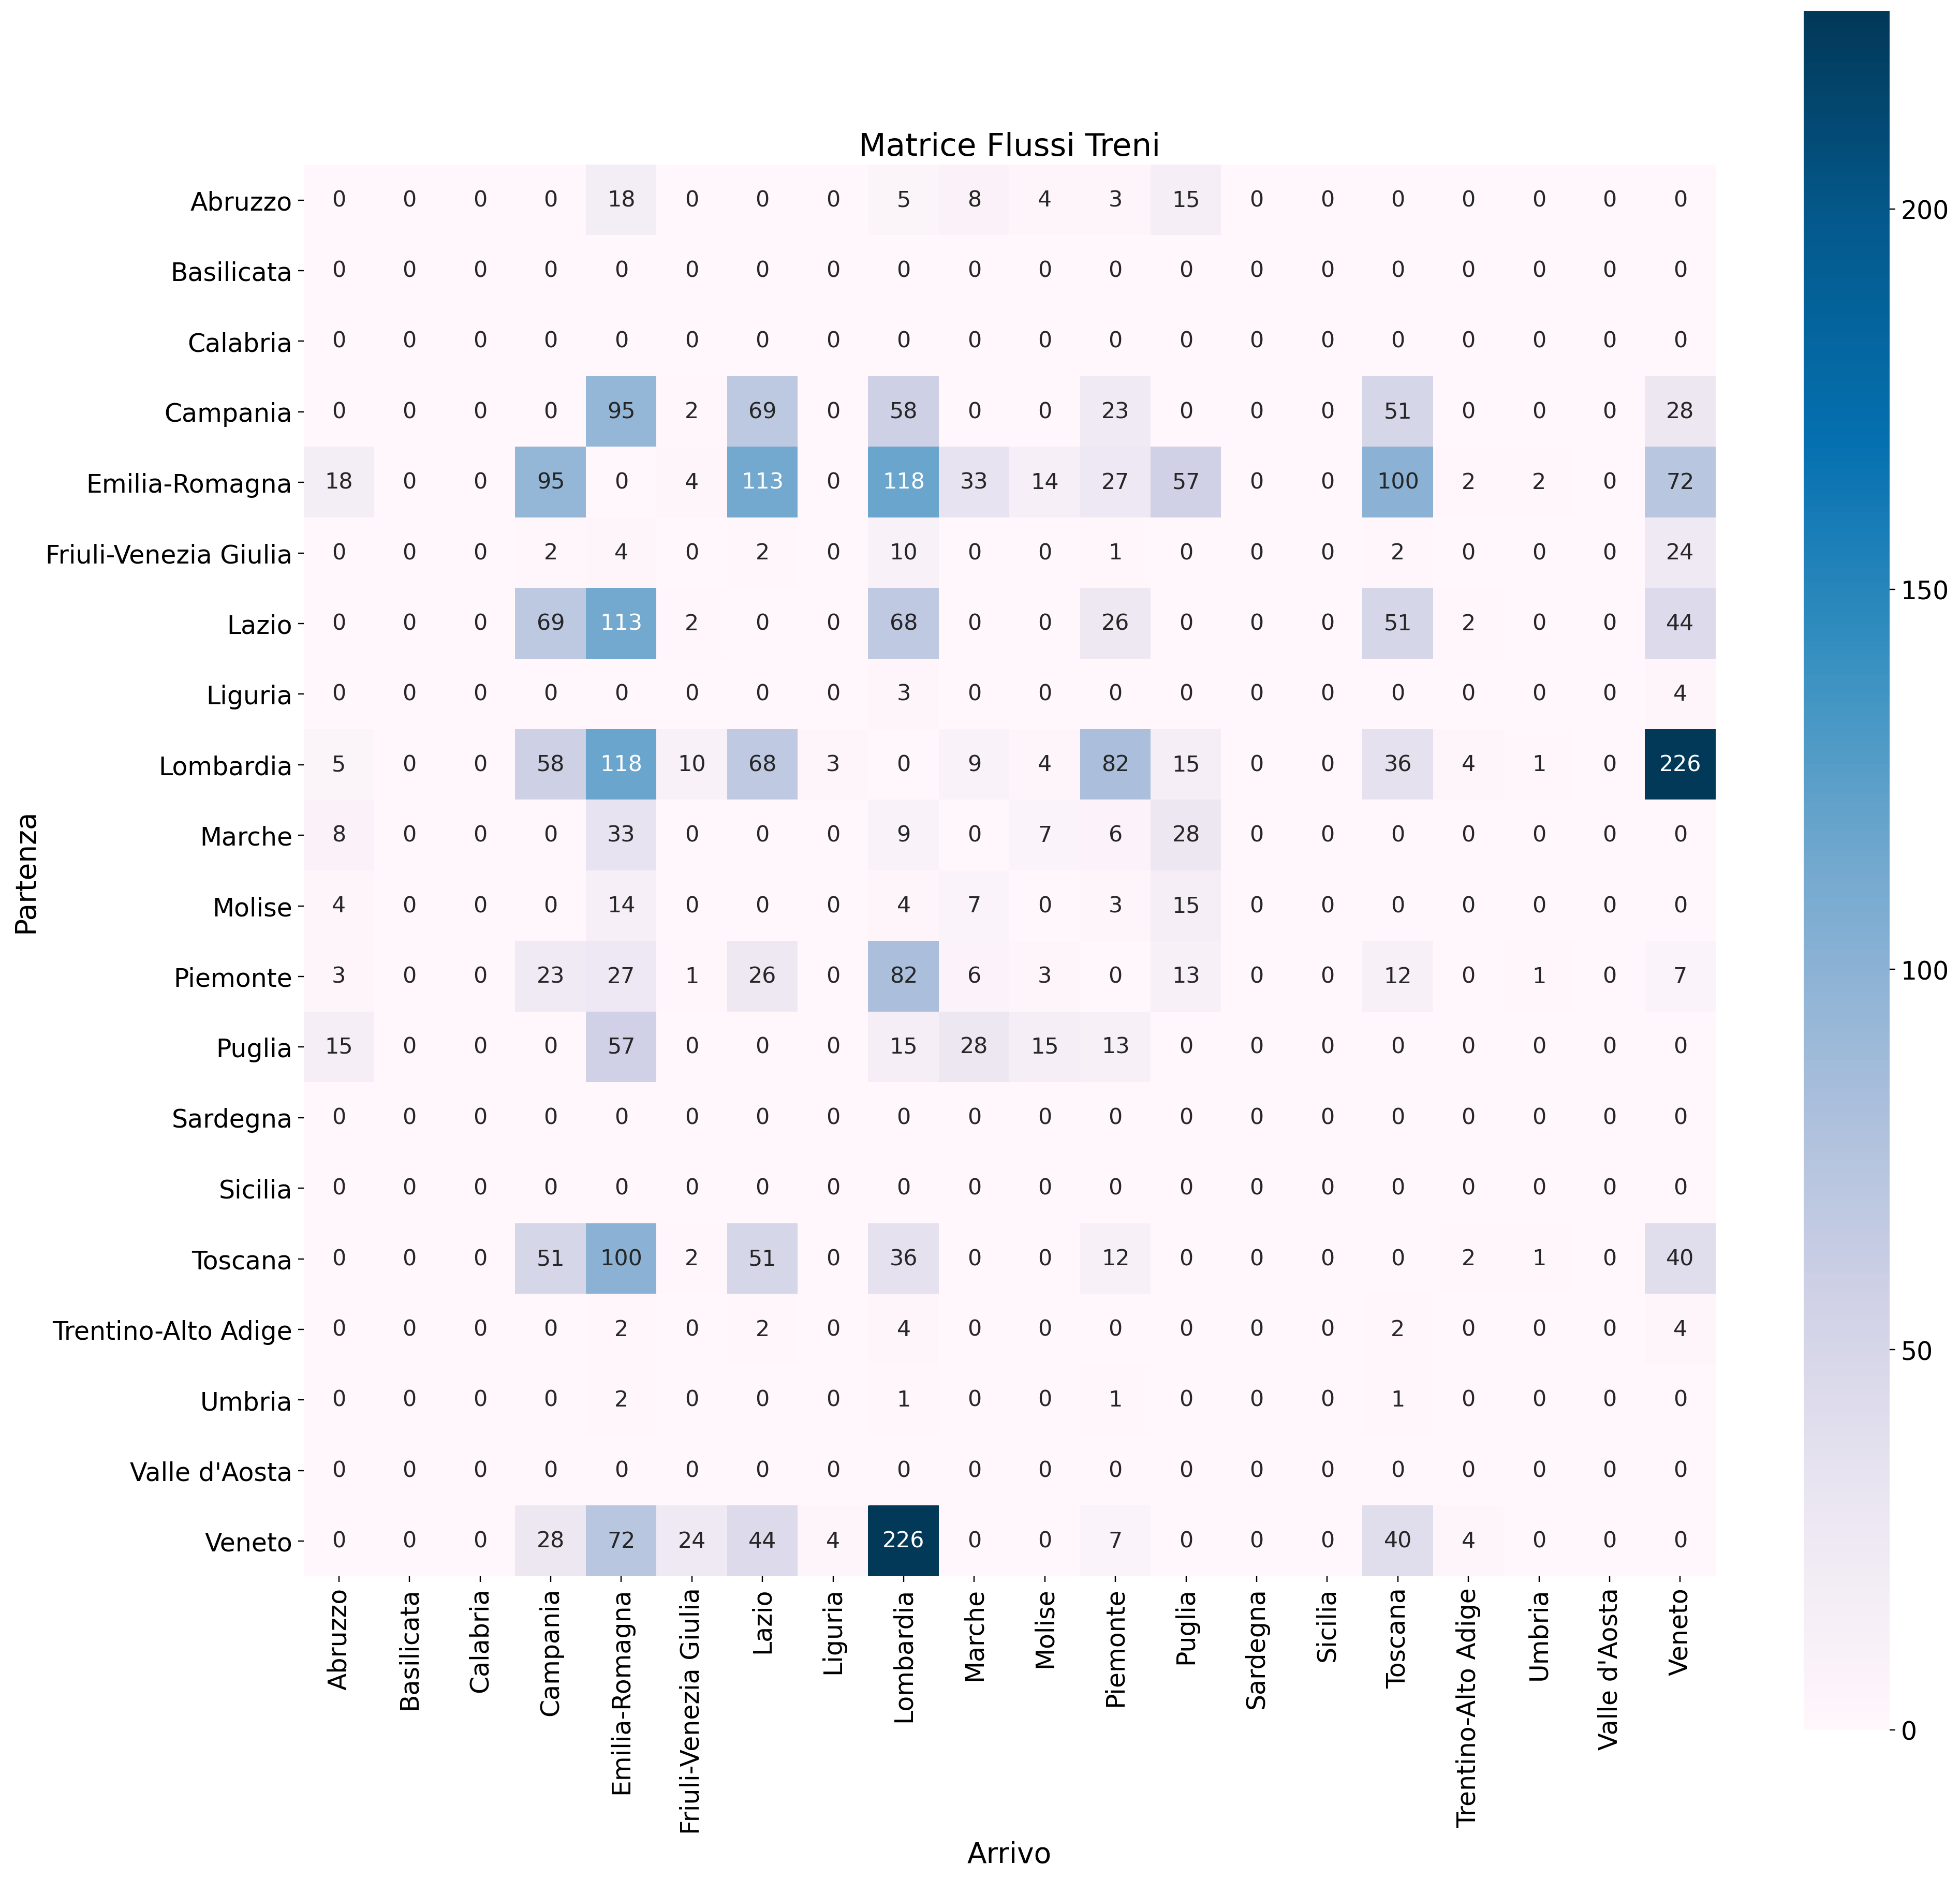

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})

plt.figure(figsize=(20,20), dpi=220)
plt.title('Matrice Flussi Treni', fontsize=20)
hm = sns.heatmap(matrice_regioni,cbar=True,fmt='.0f',annot=True,square=True,annot_kws={'size': 14},
                 cmap = sns.color_palette("PuBu", 500), xticklabels=regioni, yticklabels=regioni,)
plt.ylabel('Partenza',fontsize=18)
plt.xlabel('Arrivo',fontsize=18)
plt.savefig("matrice_regioni_treni.pdf", dpi=220, format='pdf')
plt.show()

In [48]:
gradi = np.zeros(20)
for riga in quadri_regioni:
    partenza = riga[0]
    arrivo = riga[1]
    flusso = riga[2]
    ii = regioni.index(partenza)
    jj = regioni.index(arrivo)
    gradi[ii] += flusso
    gradi[jj] += flusso

gradi = [jj/2 for jj in gradi]


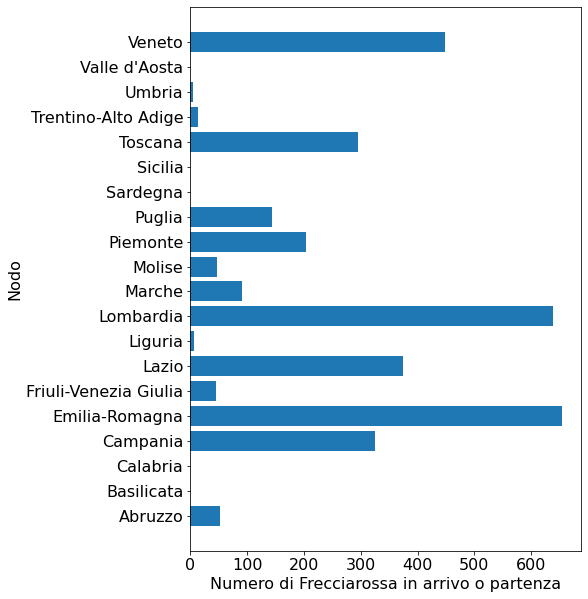

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})
plt.figure(figsize=(7,10))
plt.barh(range(len(regioni)),gradi)
plt.yticks(ticks=range(len(regioni)),labels=regioni)
plt.xlabel('Numero di Frecciarossa in arrivo o partenza')
plt.ylabel('Nodo')
plt.show()

